In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import matplotlib
%matplotlib inline

**Import Dataset**

In [ ]:
dataset=datasets.fetch_openml('mnist_784')

In [ ]:
dataset

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
data,label=dataset.data,dataset.target

In [ ]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
label=label.astype(int)

In [ ]:
label

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
data.shape

(70000, 784)

In [ ]:
label.shape

(70000,)

**Chhose One digit for analysis**

In [ ]:
choose_one_digit=data[2700]

In [ ]:
image=choose_one_digit.reshape(28,28)

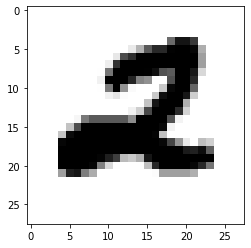

In [ ]:
plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [ ]:
#choose_one_digit=data[2700]
label[2700]

2

**Split Dataset in Train and Test**

In [ ]:
x_train,y_train=data[:2500],label[:2500]

In [ ]:
x_test,y_test=data[2500:5000],label[2500:5000]


**The next step is to create a Linear SVM object. Since there are 10 digits (0-9), we need a multi-class classifier. The Linear SVM that comes with sklearn can perform multi-class classification.**

In [ ]:
clf=LinearSVC()

In [ ]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
clf.predict(data[1:10])

array([0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
label[1:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4])

**As we can see, our predicted value and actual value are same. So, we conclude that our model is working some how perfectly.**

**Now, Lets calculate accuracy of this LinearSVC classification.**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
a=cross_val_score(clf,x_train,y_train,cv=3,scoring="accuracy")

In [ ]:
a.mean()

0.8208026615922149

**--> Create a 2 detector model using Logisctic regression**

In [ ]:
y_train_2=(y_train==2)

In [ ]:
y_train_2

array([False, False, False, ..., False, False,  True])

In [ ]:
y_test_2=(y_test==2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf2=LogisticRegression()

In [ ]:
clf2.fit(x_train,y_train_2)

In [81]:
#choose_one_digit is original Nine 
clf2.predict([choose_one_digit])

array([ True])

**We can conclude that predicted value for this image two is true.**
**Now, Lets calculate accuracy of this Logistic Regression classification.**

In [ ]:
b=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

In [ ]:
b

array([0.92925659, 0.92677071, 0.92557023])

In [ ]:
b.mean()

0.9271991770329234

In [ ]:
#choose_one_digit=6700 label=0
clf2.predict([choose_one_digit])

array([ True])

**[It's shows value is True. that means this digit is 2 digit.](https://)**

In [ ]:
label[2700]

2

**Conclusion**:


**Average Accuracy of LinearSCV= 0.82**

**Average Accuracy of Logistic Regression= 0.93**